In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.linalg as la
# import winsound

In [3]:
from fbpconvnet import *
from train import *

In [4]:
fbpcnn = fbpconvnet()

X_train, X_test, E_train, E_test = load_dataset(100, 5, which='ellipses')

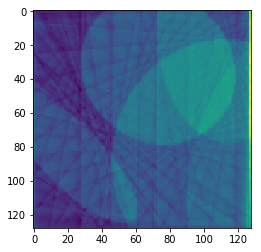

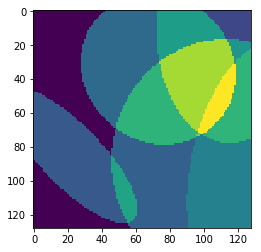

In [5]:
plt.figure(1);plt.imshow(X_train[0,:,:,0])
plt.figure(2);plt.imshow(E_train[0,:,:,0])

In [ ]:
fbpcnn.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0001), 
#               loss='mean_squared_error',#euclidean_loss,
              loss=euclidean_loss,
#               metrics=['mean_squared_error'])
              metrics=[euclidean_loss])
fbpcnn.fit(X_train, E_train,
          validation_split = 0.3,
          batch_size=1,
          epochs=100)
# duration = 1000  # millisecond
# freq = 440  # Hz
# winsound.Beep(freq, duration)

Train on 70 samples, validate on 30 samples
Epoch 1/100
70/70 [==============================] - 1s 21ms/step - loss: 4.8653 - euclidean_loss: 4.8653 - val_loss: 5.6866 - val_euclidean_loss: 5.6866
Epoch 2/100
70/70 [==============================] - 1s 10ms/step - loss: 4.7426 - euclidean_loss: 4.7426 - val_loss: 5.7285 - val_euclidean_loss: 5.7285
Epoch 3/100
70/70 [==============================] - 1s 10ms/step - loss: 4.7807 - euclidean_loss: 4.7807 - val_loss: 5.7211 - val_euclidean_loss: 5.7211
Epoch 4/100
70/70 [==============================] - 1s 10ms/step - loss: 4.7637 - euclidean_loss: 4.7637 - val_loss: 5.7582 - val_euclidean_loss: 5.7582
Epoch 5/100
70/70 [==============================] - 1s 10ms/step - loss: 4.7487 - euclidean_loss: 4.7487 - val_loss: 5.6988 - val_euclidean_loss: 5.6988
Epoch 6/100
70/70 [==============================] - 1s 10ms/step - loss: 4.7327 - euclidean_loss: 4.7327 - val_loss: 5.6789 - val_euclidean_loss: 5.6789
Epoch 7/100
70/70 [=============

70/70 [==============================] - 1s 10ms/step - loss: 4.6533 - euclidean_loss: 4.6533 - val_loss: 5.7782 - val_euclidean_loss: 5.7782
Epoch 54/100
70/70 [==============================] - 1s 10ms/step - loss: 4.6149 - euclidean_loss: 4.6149 - val_loss: 5.7018 - val_euclidean_loss: 5.7018
Epoch 55/100
70/70 [==============================] - 1s 10ms/step - loss: 4.5987 - euclidean_loss: 4.5987 - val_loss: 5.6660 - val_euclidean_loss: 5.6660
Epoch 56/100
70/70 [==============================] - 1s 10ms/step - loss: 4.5795 - euclidean_loss: 4.5795 - val_loss: 5.7031 - val_euclidean_loss: 5.7031
Epoch 57/100
70/70 [==============================] - 1s 10ms/step - loss: 4.6535 - euclidean_loss: 4.6535 - val_loss: 5.7066 - val_euclidean_loss: 5.7066
Epoch 58/100
70/70 [==============================] - 1s 10ms/step - loss: 4.6111 - euclidean_loss: 4.6111 - val_loss: 5.6550 - val_euclidean_loss: 5.6550
Epoch 59/100
70/70 [==============================] - 1s 10ms/step - loss: 4.6107 -

In [24]:
X_recon = fbpcnn.predict(X_test)
test_loss, test_acc = fbpcnn.evaluate(X_recon, E_test)
print(test_loss, test_acc)

5/5 [==============================] - 0s 2ms/step
8.610849380493164 8.610849380493164


In [1]:
X_recon = fbpcnn.predict(X_train)
plt.figure(1);plt.imshow(X_train[1,:,:,0], cmap='gray');plt.colorbar()
plt.figure(2);plt.imshow(E_train[1,:,:,0], cmap='gray');plt.colorbar()
plt.figure(3);plt.imshow(X_recon[1,:,:,0], cmap='gray');plt.colorbar()

# X_recon_edit = (X_recon-1.5)*(X_recon>=1.5)
# plt.figure(3);plt.imshow(X_recon_edit[1,:,:,0], cmap='gray');plt.colorbar()

NameError: name 'fbpcnn' is not defined

In [8]:
la.norm(E_train[0,:,:,0].flatten() - X_train[0,:,:,0].flatten())

12.838947219490471

In [9]:
la.norm(E_train[0,:,:,0].flatten() - X_recon[0,:,:,0].flatten())

6.809312540477602

In [10]:
X_recon = fbpcnn.predict(X_test)

In [11]:
la.norm(E_test[0,:,:,0].flatten() - X_test[0,:,:,0].flatten())

16.141471760904203

In [12]:
la.norm(E_test[0,:,:,0].flatten() - X_recon[0,:,:,0].flatten())

6.1337109559349

In [13]:
sess = tf.InteractiveSession()
print(euclidean_loss(X_recon, E_train).eval())
sess.close()

ValueError: operands could not be broadcast together with shapes (20,128,128,1) (5,128,128,1) 

In [11]:
np.amin(X_train)

-0.744609055695334

In [12]:
np.amax(E_train)

7.417872827639148

In [7]:
duration = 1000  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)

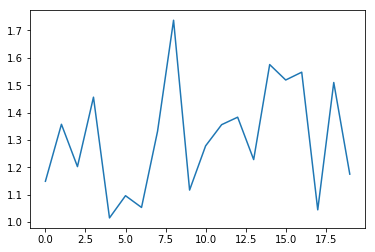

In [7]:
maxs = np.zeros(X_train.shape[0])
mins = np.zeros(X_train.shape[0])

for i in range(X_train.shape[0]):
    maxs[i] = np.amax(X_train[i,:,:,:])
    mins[i] = np.amin(X_train[i,:,:,:])
    
plt.plot(maxs-mins)